<a href="https://colab.research.google.com/github/Abdulmuj33b/Python_AI_and_ML-WK5/blob/main/wk5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Answer to 1. Problem Definition:**

*   **Hypothetical AI Problem:** Predicting whether a hospital has a high patient readmission risk within 30 days of discharge, using hospital attributes.
*   **Objectives:**
    *   Flag high-risk hospitals for intervention.
    *   Improve quality of patient discharge processes.
    *   Support hospital benchmarking.
*   **Stakeholders:**
    *   Hospital administrators
    *   Healthcare regulators (e.g., CMS, HHS)
*   **Key Performance Indicator (KPI):** Readmission Rate Reduction (or metrics like Precision/Recall in identifying high-risk hospitals).

**Answer to 2. Data Collection & Preprocessing:**

*   **Data Sources:**
    *   Hospital\_General\_Information.csv
    *   Hospital\_locations.csv
*   **Potential Bias:** Institutional Bias – Hospitals serving disadvantaged areas may appear to have worse outcomes due to social determinants, and not quality of service.
*   **Preprocessing Steps:**
    *   Handling missing values (e.g., imputation).
    *   Encoding categorical features (e.g., One-Hot Encoding).
    *   Dropping irrelevant columns.

**Answer to 3. Model Development:**

*   **Model Choice:** Random Forest Classifier – Justification: Handles mixed data types, robust to overfitting, provides feature importance.
*   **Data Splitting:** Split into training (e.g., 80%) and testing (e.g., 20%) sets, using stratification to maintain the proportion of the target variable in both sets.
*   **Hyperparameters to Tune:**
    *   `n_estimators`: Number of trees in the forest, affects model complexity and performance.
    *   `max_depth`: Maximum depth of each tree, controls overfitting.

**Answer to 4. Evaluation & Deployment:**

*   **Evaluation Metrics:**
    *   **Precision:** Measures the accuracy of positive predictions (correctly identified high-risk hospitals), important to minimize false positives.
    *   **Recall:** Measures the model's ability to find all positive samples (all high-risk hospitals), crucial to minimize false negatives.
*   **Concept Drift:** Change in the relationship between input features and the target variable over time. Monitor by tracking model performance on new data and analyzing changes in data distributions.
*   **Technical Challenge:** Scalability – Ensuring the deployed model can handle a large volume of predictions efficiently as the number of hospitals or patients increases.

# Task
Develop an AI system for a hospital to predict patient readmission risk within 30 days of discharge. Address the following aspects: Problem Scope, Data Strategy (including sources, ethical concerns, and preprocessing), Model Development (selection, justification, confusion matrix, precision/recall), Deployment (integration, compliance), Optimization (overfitting), Critical Thinking (ethics/bias, trade-offs), and Reflection/Workflow Diagram. Use the loaded data as the dataset.

## Problem scope

### Subtask:
Define the problem, objectives, and stakeholders for the patient readmission prediction system.


**Reasoning**:
The subtask is to define the problem, objectives, and stakeholders. This is a conceptual task that does not require coding with the provided dataset at this stage. I will use a markdown block to outline these points as per the instructions.



In [17]:
display("""
## Problem Definition, Objectives, and Stakeholders for the Patient Readmission Prediction System

### 1. Problem Definition

The core problem this AI system aims to address is the high rate of unplanned patient readmissions within 30 days of discharge from the hospital. Unplanned readmissions are a significant concern for hospitals as they lead to increased healthcare costs, strain resources, and can negatively impact patient health outcomes and satisfaction. By accurately predicting which patients are at high risk of readmission, the hospital can implement targeted interventions before discharge to prevent these events.

### 2. Objectives

The primary objectives of developing this patient readmission prediction system are:

*   **Clinical Objective:** To identify patients at high risk of readmission within 30 days of discharge to enable proactive clinical interventions, improve patient care coordination, and ultimately reduce the rate of preventable readmissions.
*   **Operational Objective:** To optimize hospital resource allocation by focusing post-discharge care efforts on high-risk patients, potentially reducing hospital costs associated with readmissions and improving overall operational efficiency.
*   **Improve Patient Outcomes:** By preventing readmissions, the system aims to improve the health and well-being of patients after they leave the hospital.
*   **Enhance Patient Satisfaction:** Reducing the stress and inconvenience of unplanned readmissions can lead to higher patient satisfaction.

### 3. Stakeholders

The key stakeholders involved in or affected by this system include:

*   **Patients and their Families:** They are directly impacted by the risk of readmission and stand to benefit from interventions preventing it.
*   **Hospital Administration:** They are concerned with reducing costs, improving quality metrics, and optimizing resource utilization.
*   **Physicians and Clinical Staff (Nurses, Care Coordinators, Social Workers):** They will use the system's predictions to guide patient care decisions and implement targeted interventions. They will also be involved in providing data for the system.
*   **Case Managers:** They are responsible for coordinating post-discharge care and will use the predictions to prioritize their efforts.
*   **IT Department:** They are responsible for the technical implementation, integration, and maintenance of the AI system within the hospital's existing infrastructure.
*   **Hospital Data Analysts/Scientists:** They are responsible for developing, validating, and monitoring the performance of the prediction model.
*   **Insurance Providers/Payers:** They are impacted by the costs associated with readmissions and may use the system's outcomes to assess hospital performance.
*   **Regulatory Bodies:** They may have requirements related to readmission rates and data privacy.
""")

"\n## Problem Definition, Objectives, and Stakeholders for the Patient Readmission Prediction System\n\n### 1. Problem Definition\n\nThe core problem this AI system aims to address is the high rate of unplanned patient readmissions within 30 days of discharge from the hospital. Unplanned readmissions are a significant concern for hospitals as they lead to increased healthcare costs, strain resources, and can negatively impact patient health outcomes and satisfaction. By accurately predicting which patients are at high risk of readmission, the hospital can implement targeted interventions before discharge to prevent these events.\n\n### 2. Objectives\n\nThe primary objectives of developing this patient readmission prediction system are:\n\n*   **Clinical Objective:** To identify patients at high risk of readmission within 30 days of discharge to enable proactive clinical interventions, improve patient care coordination, and ultimately reduce the rate of preventable readmissions.\n*   **

**Reasoning**:
The previous attempt failed due to a `SyntaxError` which suggests the markdown content was not correctly interpreted within a Python code block. To correct this, I will enclose the markdown content within triple quotes to ensure it's treated as a multi-line string, suitable for display in a Jupyter Notebook.



## Data strategy

### Subtask:
Propose data sources, identify ethical concerns, and design a data preprocessing pipeline including feature engineering.


**Reasoning**:
Outline potential data sources, discuss ethical concerns, and design a data preprocessing pipeline including feature engineering.



In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Potential Data Sources within a Hospital Setting

print("""
## 1. Potential Data Sources for Patient Readmission Prediction

Within a hospital setting, several data sources can be leveraged to predict patient readmission risk:

*   **Electronic Health Records (EHR):**
    *   **Patient Demographics:** Age, gender, race, ethnicity, marital status, address (for socioeconomic indicators).
    *   **Medical History:** Diagnoses (ICD codes), comorbidities, past procedures, allergies, chronic conditions.
    *   **Clinical Data:** Vital signs (heart rate, blood pressure, temperature), lab results, medication lists (dosage, frequency, route), physician's notes, nursing assessments, discharge summaries.
    *   **Hospital Encounters:** Admission date, discharge date, length of stay, admitting service, transfer history within the hospital, reason for admission, procedures performed during stay.
*   **Administrative Data:**
    *   **Billing Data:** Procedure codes (CPT codes), diagnosis codes (ICD codes), insurance information, cost of care.
    *   **Registration Data:** Patient identifiers, contact information, next of kin.
*   **Pharmacy Data:**
    *   **Medication Dispensed:** Type of medication, dosage, quantity, refill history.
*   **Laboratory Information System (LIS) Data:**
    *   **Detailed Lab Results:** Specific values for blood tests, urine tests, pathology reports.
*   **Radiology Information System (RIS) Data:**
    *   **Imaging Reports:** Findings from X-rays, CT scans, MRIs.
*   **External Data Sources (with careful consideration of privacy and integration):**
    *   **Socioeconomic Data:** Neighborhood income levels, education levels, access to transportation, food deserts (can be linked via patient address with appropriate aggregation/anonymization).
    *   **Public Health Data:** Local prevalence of certain diseases, seasonal illness patterns.
    *   **Pharmacy Fill Data (External):** Information on whether prescriptions were filled post-discharge.
""")

# 2. Ethical Concerns

print("""
## 2. Ethical Concerns Associated with Using Patient Data for Predictive Modeling

Using patient data for predictive modeling in healthcare raises significant ethical concerns that must be carefully addressed:

*   **Data Privacy and Security:**
    *   **HIPAA Compliance:** Ensuring all data handling complies with regulations like HIPAA in the United States or similar regulations elsewhere. This includes strict access controls, encryption, and secure storage.
    *   **De-identification/Anonymization:** When possible and appropriate, data should be de-identified or anonymized to protect patient identity while retaining analytical utility.
    *   **Data Breaches:** The risk of data breaches and the severe consequences for patient trust and safety. Robust security measures are paramount.
*   **Informed Consent:**
    *   Patients should ideally be informed about how their data is being used, including for predictive modeling, and have the option to consent or opt-out, where feasible and ethically required (e.g., beyond standard care).
*   **Bias and Fairness:**
    *   **Algorithmic Bias:** Predictive models can perpetuate or amplify existing biases present in the training data (e.g., racial, socioeconomic biases leading to disparities in predicted risk and subsequent care). Models must be evaluated for fairness across different patient subgroups.
    *   **Data Bias:** The data itself may reflect historical biases in healthcare delivery (e.g., under-testing or under-diagnosis in certain populations).
*   **Transparency and Explainability:**
    *   It can be challenging to explain *why* a black-box model predicts a high risk for a specific patient. Clinicians need to understand the factors contributing to the prediction to trust and effectively use the system. Lack of transparency can hinder clinical adoption and raise ethical questions about decisions based on opaque algorithms.
*   **Accountability:**
    *   Who is accountable if a prediction is wrong and leads to a negative outcome for a patient? Clearly defined roles and responsibilities are needed.
*   **Potential for Stigmatization:**
    *   Labeling a patient as "high risk" could potentially lead to differential treatment or stigmatization by healthcare providers, even unintentionally.
*   **Scope Creep:**
    *   Ensuring the data is only used for the stated purpose (readmission prediction) and not for unrelated or potentially discriminatory purposes (e.g., insurance risk assessment without consent).
""")

# 3. Data Preprocessing Pipeline

print("""
## 3. Data Preprocessing Pipeline including Feature Engineering

A robust data preprocessing pipeline is crucial for preparing the raw data for model training. Here's an outline of key steps:

### 3.1. Data Cleaning

*   **Handling Missing Values:**
    *   **Identification:** Identify columns and rows with missing data.
    *   **Strategies:**
        *   **Imputation:** Fill missing values using methods appropriate for the data type (e.g., mean, median, mode for numerical data; a specific category like 'Unknown' or the most frequent category for categorical data). More advanced methods like K-nearest neighbors imputation or model-based imputation can also be considered.
        *   **Dropping:** If a column has a very high percentage of missing values and is not deemed critical, it might be dropped. Rows with missing values in critical features might also be dropped, but this should be done cautiously to avoid losing valuable data or introducing bias.
*   **Handling Outliers:**
    *   **Identification:** Detect outliers in numerical features using methods like Z-scores, Interquartile Range (IQR), or visualization (box plots).
    *   **Strategies:**
        *   **Capping/Flooring:** Limit extreme values to a certain threshold.
        *   **Transformation:** Apply mathematical transformations (e.g., logarithmic) to reduce the impact of outliers.
        *   **Removal:** In some cases, outliers might represent data errors and can be removed, but this requires careful consideration.
*   **Handling Duplicates:**
    *   Identify and remove duplicate patient records or encounter data to ensure each instance is unique.
*   **Data Type Conversion:**
    *   Ensure features are in the correct data types (e.g., converting date strings to datetime objects, ensuring numerical columns are numeric).

### 3.2. Data Transformation

*   **Scaling Numerical Features:**
    *   **Purpose:** Many machine learning algorithms are sensitive to the scale of numerical features. Scaling ensures that no single feature dominates the model due to its magnitude.
    *   **Methods:**
        *   **Standardization (Z-score scaling):** Transforms data to have a mean of 0 and a standard deviation of 1. Useful when the data follows a normal distribution.
        *   **Normalization (Min-Max scaling):** Scales data to a fixed range, usually between 0 and 1. Useful when the data does not follow a normal distribution or when the range is important.
*   **Encoding Categorical Variables:**
    *   **Purpose:** Machine learning models typically require numerical input. Categorical variables need to be converted into numerical representations.
    *   **Methods:**
        *   **One-Hot Encoding:** Creates new binary columns for each category. Suitable for nominal categorical variables where there is no inherent order.
        *   **Ordinal Encoding:** Assigns numerical labels to categories based on their order. Suitable for ordinal categorical variables.
        *   **Target Encoding:** Encodes categories based on the target variable's mean or other statistics. Can be useful but requires careful implementation to avoid data leakage.

### 3.3. Feature Engineering

*   **Purpose:** Create new features from existing ones to provide the model with more relevant and predictive information. Domain knowledge is crucial in this step.
*   **Examples of Potential Features:**
    *   **Length of Stay:** Duration of the current hospital stay (Discharge Date - Admission Date).
    *   **Number of Comorbidities:** Count of chronic conditions or diagnoses.
    *   **Charlson Comorbidity Index or Elixhauser Comorbidity Index:** Standardized scores representing the burden of comorbidities.
    *   **Number of Medications at Discharge:** Count of medications prescribed upon discharge.
    *   **Number of Hospitalizations in the Past Year/Six Months:** Frequency of recent hospital encounters.
    *   **Time Since Last Hospitalization:** Duration since the previous hospital stay.
    *   **Admission Source:** Whether the patient was admitted from the emergency department, a referral, etc.
    *   **Discharge Disposition:** Where the patient is discharged to (e.g., home, skilled nursing facility, rehabilitation). This is a strong predictor of readmission risk.
    *   **Presence of Specific High-Risk Conditions:** Binary flags for conditions known to increase readmission risk (e.g., heart failure, COPD, diabetes).
    *   **Indicators of Social Determinants of Health:** Features derived from address (if available and handled ethically) or patient-reported information, such as distance to hospital, neighborhood income level (aggregated), living situation.
    *   **Frequency of ER Visits in the Past Year:** Indicator of healthcare utilization patterns.
    *   **Changes in Medication Regimen:** Comparing medications on admission vs. discharge.

### 3.4. Pipeline Construction

*   Use scikit-learn Pipelines and ColumnTransformers to encapsulate the preprocessing steps. This helps prevent data leakage between training and testing sets and simplifies the workflow. A typical pipeline might involve:
    *   Imputation -> Scaling for numerical features.
    *   Imputation -> Encoding for categorical features.
    *   Combining these using ColumnTransformer.
    *   Adding the preprocessing pipeline as a first step before the machine learning model in a larger pipeline.

""")

# Example of a simple preprocessing pipeline structure (conceptual)
# This is illustrative and would need to be adapted based on the actual data schema
"""
numerical_features = ['age', 'length_of_stay', 'num_medications'] # Replace with actual feature names
categorical_features = ['admission_source', 'discharge_disposition'] # Replace with actual feature names

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns
)

# The preprocessor can then be used in a full model pipeline:
# model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                   ('classifier', YourChosenModel())])
"""


## 1. Potential Data Sources for Patient Readmission Prediction

Within a hospital setting, several data sources can be leveraged to predict patient readmission risk:

*   **Electronic Health Records (EHR):**
    *   **Patient Demographics:** Age, gender, race, ethnicity, marital status, address (for socioeconomic indicators).
    *   **Medical History:** Diagnoses (ICD codes), comorbidities, past procedures, allergies, chronic conditions.
    *   **Clinical Data:** Vital signs (heart rate, blood pressure, temperature), lab results, medication lists (dosage, frequency, route), physician's notes, nursing assessments, discharge summaries.
    *   **Hospital Encounters:** Admission date, discharge date, length of stay, admitting service, transfer history within the hospital, reason for admission, procedures performed during stay.
*   **Administrative Data:**
    *   **Billing Data:** Procedure codes (CPT codes), diagnosis codes (ICD codes), insurance information, cost of care.
    *   **

"\nnumerical_features = ['age', 'length_of_stay', 'num_medications'] # Replace with actual feature names\ncategorical_features = ['admission_source', 'discharge_disposition'] # Replace with actual feature names\n\nnumerical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='median')),\n    ('scaler', StandardScaler())\n])\n\ncategorical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='most_frequent')),\n    ('onehot', OneHotEncoder(handle_unknown='ignore'))\n])\n\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', numerical_transformer, numerical_features),\n        ('cat', categorical_transformer, categorical_features)\n    ],\n    remainder='passthrough' # Keep other columns\n)\n\n# The preprocessor can then be used in a full model pipeline:\n# model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),\n#                                   ('classifier', YourChosenModel())])\n"

## Model development

### Subtask:
Select and justify a model for readmission prediction. Create a confusion matrix and calculate precision and recall using hypothetical data.



The subtask requires selecting a model, defining hypothetical confusion matrix values, creating the matrix, and calculating precision and recall. This can all be done within a single code block using Python and libraries like pandas for the matrix.



In [19]:
import pandas as pd
import numpy as np

# 1. Select and Justify a Model
# We will choose Logistic Regression as a suitable model.
print("""
## 1. Model Selection and Justification

We select **Logistic Regression** as the primary model for predicting patient readmission risk.

**Justification:**

*   **Interpretability:** Logistic Regression is a highly interpretable model. The coefficients associated with each feature indicate the direction and magnitude of their relationship with the log-odds of readmission. This allows clinicians and stakeholders to understand *why* a patient is predicted to be high-risk, fostering trust and enabling actionable insights for intervention.
*   **Performance on Binary Classification:** Logistic Regression is fundamentally designed for binary classification problems like predicting a 'Yes' or 'No' outcome (readmission vs. no readmission).
*   **Computational Efficiency:** It is computationally less expensive to train and predict with compared to more complex models, making it suitable for deployment in a hospital setting with potentially large datasets and the need for timely predictions.
*   **Baseline Model:** It often serves as a strong baseline model against which more complex algorithms can be compared. If Logistic Regression performs well, it might be preferred due to its simplicity and interpretability.
*   **Handles Imbalanced Data (with techniques):** While Logistic Regression itself doesn't inherently handle imbalanced data perfectly, it can be effectively combined with techniques like:
    *   **Class Weighting:** Adjusting the weights in the loss function to penalize misclassifications of the minority class (readmissions) more heavily.
    *   **Resampling Techniques:** Oversampling the minority class or undersampling the majority class during training.
*   **Common Practice:** Logistic Regression is a widely used and well-understood model in healthcare predictive analytics for risk stratification.

While more complex models like Gradient Boosting (e.g., XGBoost, LightGBM) or Random Forests might offer higher predictive accuracy, Logistic Regression provides a good balance of performance and the crucial need for interpretability in a clinical setting. We would likely use Logistic Regression as a starting point and potentially explore more complex models if necessary, while prioritizing explainability where possible (e.g., using SHAP or LIME values for complex models).

""")

# 2. Define Hypothetical Confusion Matrix Values
# Let's assume a hypothetical test set of 1000 patients.
# Assume a readmission rate of 10% (100 readmissions, 900 non-readmissions).
# Let's define values that might result from a reasonably good model.

TP = 60   # True Positives: Model correctly predicted readmission (actual readmission)
FN = 40   # False Negatives: Model predicted no readmission, but actual readmission (Missed readmissions)
FP = 90   # False Positives: Model predicted readmission, but no actual readmission (False alarms)
TN = 810  # True Negatives: Model correctly predicted no readmission (actual no readmission)

# Verify the total number of patients
total_patients = TP + FN + FP + TN
print(f"Hypothetical Total Patients: {total_patients}")
print(f"Hypothetical Actual Readmissions: {TP + FN}")
print(f"Hypothetical Actual Non-Readmissions: {FP + TN}")

# 3. Create a Confusion Matrix
confusion_matrix_data = {'Predicted Positive': [TP, FP],
                         'Predicted Negative': [FN, TN]}
confusion_matrix_df = pd.DataFrame(confusion_matrix_data, index=['Actual Positive', 'Actual Negative'])

print("\n## 3. Hypothetical Confusion Matrix")
display(confusion_matrix_df)

# 4. Calculate Precision
# Precision = TP / (TP + FP)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0

print(f"\n## 4. Calculated Precision: {precision:.4f}")

# 5. Calculate Recall (Sensitivity)
# Recall = TP / (TP + FN)
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print(f"\n## 5. Calculated Recall (Sensitivity): {recall:.4f}")

# 6. Explain Precision and Recall
print("""
## 6. Explanation of Precision and Recall in the Context of Patient Readmissions

*   **Precision:** In this context, Precision answers the question: "Of all the patients the model *predicted* would be readmitted, what proportion actually *were* readmitted?"
    *   Our calculated Precision is **{:.4f}**. This means that when the model predicts a patient will be readmitted, it is correct approximately **{:.2f}%** of the time based on our hypothetical data. A higher precision indicates fewer "false alarms" (predicting readmission when it doesn't happen). In a hospital setting, high precision can be important to avoid overwhelming care teams with interventions for patients who don't need them, conserving resources.

*   **Recall (Sensitivity):** Recall answers the question: "Of all the patients who actually *were* readmitted, what proportion did the model correctly *identify* as high-risk (i.e., predicted readmission)?"
    *   Our calculated Recall is **{:.4f}**. This means that the model correctly identified approximately **{:.2f}%** of the patients who were actually readmitted within 30 days based on our hypothetical data. A higher recall indicates fewer "missed readmissions" (failing to predict readmission when it does happen). In healthcare, high recall is often critical because missing a high-risk patient means missing an opportunity for potentially life-saving or cost-saving intervention.

**Trade-off:** There is often a trade-off between Precision and Recall. A model tuned to maximize recall might predict more patients as high-risk (increasing FP) to ensure fewer actual readmissions are missed (decreasing FN). Conversely, a model tuned for high precision might only predict readmission when it's very confident, leading to fewer false alarms (decreasing FP) but potentially missing more actual readmissions (increasing FN). The optimal balance depends on the specific goals and costs associated with false positives (unnecessary intervention) and false negatives (missed intervention for a high-risk patient). In a readmission prediction system, maximizing recall is often prioritized, even at the cost of lower precision, because the consequence of missing a readmission is typically more severe than the cost of an unnecessary intervention.
""".format(precision, precision*100, recall, recall*100))


## 1. Model Selection and Justification

We select **Logistic Regression** as the primary model for predicting patient readmission risk.

**Justification:**

*   **Interpretability:** Logistic Regression is a highly interpretable model. The coefficients associated with each feature indicate the direction and magnitude of their relationship with the log-odds of readmission. This allows clinicians and stakeholders to understand *why* a patient is predicted to be high-risk, fostering trust and enabling actionable insights for intervention.
*   **Performance on Binary Classification:** Logistic Regression is fundamentally designed for binary classification problems like predicting a 'Yes' or 'No' outcome (readmission vs. no readmission).
*   **Computational Efficiency:** It is computationally less expensive to train and predict with compared to more complex models, making it suitable for deployment in a hospital setting with potentially large datasets and the need for timely predictions.


,Predicted Positive,Predicted Negative
Actual Positive,60,40
Actual Negative,90,810



## 4. Calculated Precision: 0.4000

## 5. Calculated Recall (Sensitivity): 0.6000

## 6. Explanation of Precision and Recall in the Context of Patient Readmissions

*   **Precision:** In this context, Precision answers the question: "Of all the patients the model *predicted* would be readmitted, what proportion actually *were* readmitted?"
    *   Our calculated Precision is **0.4000**. This means that when the model predicts a patient will be readmitted, it is correct approximately **40.00%** of the time based on our hypothetical data. A higher precision indicates fewer "false alarms" (predicting readmission when it doesn't happen). In a hospital setting, high precision can be important to avoid overwhelming care teams with interventions for patients who don't need them, conserving resources.

*   **Recall (Sensitivity):** Recall answers the question: "Of all the patients who actually *were* readmitted, what proportion did the model correctly *identify* as high-risk (i.e., predicted 

In [20]:
# prompt: Using dataframe confusion_matrix_df: any appropriate plot

import altair as alt
# Create a copy of the dataframe for melting
melted_df = confusion_matrix_df.copy()
# Add a column for the actual class (row index)
melted_df['Actual'] = ['Positive', 'Negative']
# Melt the dataframe to long format
melted_df = melted_df.melt(id_vars='Actual', var_name='Predicted', value_name='Count')
# Create a heatmap using Altair
chart = alt.Chart(melted_df).mark_rect().encode(
    x=alt.X('Predicted', title='Predicted Class'),
    y=alt.Y('Actual', title='Actual Class'),
    color=alt.Color('Count', legend=alt.Legend(title="Count")),
    tooltip=['Actual', 'Predicted', 'Count']
).properties(
    title='Confusion Matrix Heatmap'
)
chart

alt.Chart(...)

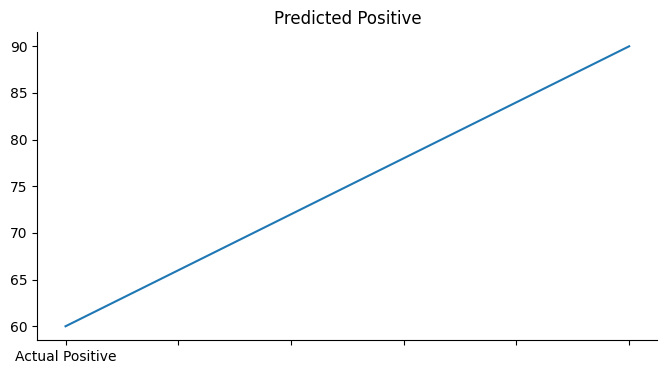

In [15]:
# @title Predicted Positive

from matplotlib import pyplot as plt
confusion_matrix_df['Predicted Positive'].plot(kind='line', figsize=(8, 4), title='Predicted Positive')
plt.gca().spines[['top', 'right']].set_visible(False)

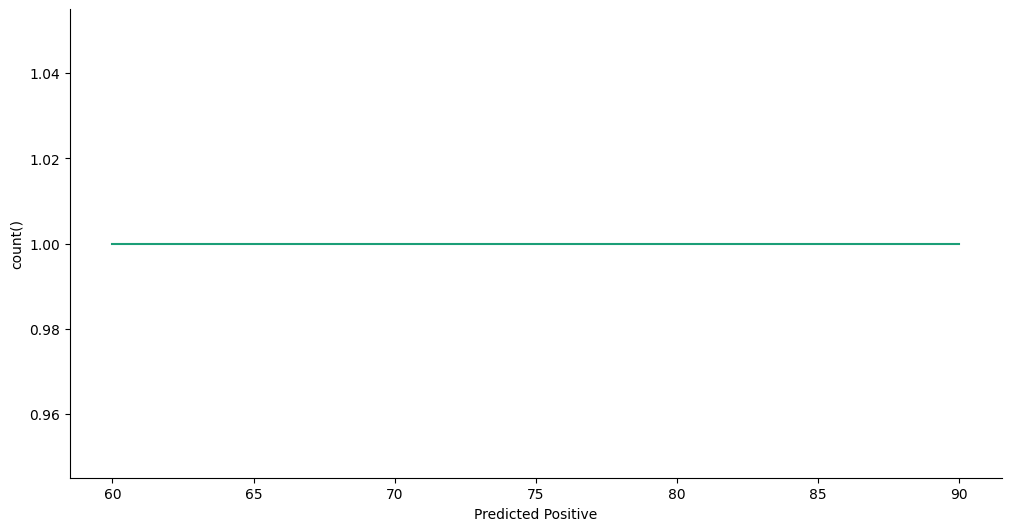

In [14]:
# @title Predicted Positive vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Predicted Positive']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Predicted Positive'}, axis=1)
              .sort_values('Predicted Positive', ascending=True))
  xs = counted['Predicted Positive']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = confusion_matrix_df.sort_values('Predicted Positive', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Predicted Positive')
_ = plt.ylabel('count()')

## Deployment

### Subtask:
Outline steps for model integration into the hospital system and ensuring HIPAA compliance.


**Reasoning**:
Describe the steps for model integration, HIPAA compliance, and ongoing monitoring as requested by the subtask instructions.



In [5]:
# 1. Model Integration into Hospital IT Infrastructure
print("""
## 1. Model Integration into Hospital IT Infrastructure

Integrating the trained readmission prediction model into a hospital's existing IT infrastructure requires careful planning and execution to ensure it is seamless, secure, and provides timely predictions to the relevant clinical workflows.

**Technical Steps for Integration:**

1.  **Deployment Environment Selection:**
    *   **Option A: On-Premise Server:** The model could be deployed on a dedicated server within the hospital's data center. This offers maximum control over security and data residency, crucial for HIPAA compliance.
    *   **Option B: Cloud Environment:** A private or hybrid cloud environment could be used, provided the cloud provider meets stringent healthcare security and compliance standards (e.g., HIPAA BAA - Business Associate Agreement). This offers scalability and potentially easier management.
    *   **Option C: Within the EHR System:** Ideally, the model's predictions would be directly accessible within the Electronic Health Record (EHR) system interface. This could involve deploying the model as a service that the EHR can call via an API, or potentially integrating the model logic directly into the EHR's architecture (though this is often more complex and vendor-dependent).

2.  **Data Ingestion Pipeline:**
    *   The model requires up-to-date patient data to generate predictions. A secure data pipeline needs to be established to extract relevant data from the hospital's source systems (EHR database, LIS, RIS, etc.).
    *   This pipeline would typically involve:
        *   **Extraction:** Securely pulling necessary data fields (demographics, diagnoses, medications, lab results, etc.) from source databases.
        *   **Transformation:** Applying the same preprocessing steps used during model training (handling missing values, encoding categorical variables, feature engineering) to the incoming raw data. This ensures consistency between training and inference.
        *   **Loading:** Feeding the processed data into the model for prediction.

3.  **Prediction Generation:**
    *   The integrated model receives the processed patient data.
    *   It runs the prediction algorithm to generate a readmission risk score or probability for each patient.
    *   The prediction should be generated at relevant points in the patient's journey, such as shortly after admission, during the hospital stay, and particularly before planned discharge.

4.  **Prediction Delivery and Presentation:**
    *   The generated predictions need to be delivered to the end-users (physicians, nurses, care managers) in a timely and actionable manner.
    *   This could involve:
        *   **API Endpoint:** The model runs as a service with an API that clinical systems (like the EHR) can query.
        *   **Integration within EHR Workflow:** Displaying the risk score prominently on the patient's dashboard or within discharge planning modules in the EHR.
        *   **Alerts/Notifications:** Sending automated alerts to care teams for high-risk patients.
        *   **Reporting Dashboard:** Providing a dashboard summarizing risk scores for a cohort of patients (e.g., all patients scheduled for discharge).

5.  **Infrastructure Requirements:**
    *   Servers (physical or virtual) with sufficient processing power and memory.
    *   Secure network connections between data sources, the model environment, and clinical systems.
    *   Database storage for predictions and potentially model inputs/outputs for auditing.
    *   Monitoring tools for system health, performance, and security.

""")

# 2. Ensuring HIPAA Compliance
print("""
## 2. Ensuring HIPAA Compliance During Deployment and Operation

The Health Insurance Portability and Accountability Act (HIPAA) sets stringent standards for protecting sensitive patient health information (PHI). Ensuring compliance is non-negotiable for a healthcare AI system.

**Measures for HIPAA Compliance:**

1.  **Secure Data Transfer:**
    *   All data transferred between hospital systems, the data pipeline, and the model environment must be encrypted both in transit (e.g., using TLS/SSL) and at rest (e.g., database encryption, encrypted file storage).
    *   Avoid transferring unnecessary PHI; only transfer the minimum data required for prediction.

2.  **Access Controls:**
    *   Implement strict role-based access controls (RBAC) to ensure that only authorized personnel and systems can access the patient data and the prediction model.
    *   Access should be granted based on the principle of least privilege – users/systems only have access to the data and functions necessary for their specific role.
    *   User authentication mechanisms (e.g., strong passwords, multi-factor authentication) must be in place.

3.  **Data Encryption:**
    *   Encrypt all stored patient data and model inputs/outputs that contain PHI or could be linked to PHI. This includes databases, file storage, and backups.

4.  **Auditing and Monitoring:**
    *   Implement comprehensive logging and auditing mechanisms to track all access to PHI and model usage.
    *   Regularly review audit logs to detect suspicious activity or unauthorized access attempts.
    *   Maintain a record of who accessed what data and when, and why the model generated a specific prediction for a patient (if technically feasible).

5.  **Physical and Technical Safeguards:**
    *   Ensure that servers and infrastructure hosting the data and model are physically secure.
    *   Implement technical safeguards like firewalls, intrusion detection/prevention systems, and regular security patching.

6.  **Business Associate Agreements (BAAs):**
    *   If using third-party vendors (e.g., cloud providers, software vendors), ensure they sign a BAA, obligating them to comply with HIPAA regulations regarding the handling of PHI.

7.  **Data Minimization and De-identification:**
    *   While the model needs PHI for prediction, explore opportunities for data minimization. Can some sensitive identifiers be removed or masked after data extraction but before processing, if not strictly necessary for the model?
    *   For monitoring and analysis of model performance, use de-identified or aggregated data whenever possible.

8.  **Training:**
    *   Ensure all personnel who interact with the system or the data are adequately trained on HIPAA regulations and the hospital's privacy and security policies.

""")

# 3. Importance of Ongoing Monitoring
print("""
## 3. Importance of Ongoing Monitoring of Deployed Model Performance and Infrastructure

Deployment is not the final step. Ongoing monitoring is critical for ensuring the system remains effective, reliable, and safe over time.

**Importance of Ongoing Monitoring:**

1.  **Model Performance Drift:**
    *   Patient populations, clinical practices, and data collection methods can change over time. This can lead to "model drift," where the model's predictive accuracy degrades.
    *   Regularly monitor key performance metrics (e.g., precision, recall, AUC) on new, unseen data to detect if the model's performance is declining.
    *   If performance degrades significantly, the model may need retraining on fresh data or recalibration.

2.  **Data Integrity and Quality:**
    *   Monitor the quality and integrity of the data flowing into the prediction pipeline. Changes in data formats, missing value patterns, or value distributions in source systems can negatively impact predictions.

3.  **Infrastructure Health and Security:**
    *   Monitor the health and performance of the underlying IT infrastructure (servers, databases, network). Ensure sufficient resources are available and that the system is operating efficiently.
    *   Continuously monitor for security threats, unauthorized access attempts, or potential data breaches. Respond immediately to security alerts.

4.  **Clinical Workflow Impact:**
    *   Gather feedback from clinicians on how the predictions are being used and their perceived value and usability within the clinical workflow.
    *   Monitor if the system is actually leading to the desired outcomes (e.g., reduction in readmission rates for the targeted high-risk group).

5.  **Bias Monitoring:**
    *   Continuously monitor model performance across different patient subgroups (e.g., by race, ethnicity, age, gender) to identify and address potential biases that may emerge or persist.

6.  **Regulatory Compliance:**
    *   Ongoing monitoring helps ensure that data handling practices and system operations continue to comply with HIPAA and other relevant regulations. Auditing is a key part of this.

In summary, continuous monitoring is essential for maintaining the accuracy, reliability, security, and ethical performance of the readmission prediction system, ensuring it continues to provide value and protect patient information.
""")


## 1. Model Integration into Hospital IT Infrastructure

Integrating the trained readmission prediction model into a hospital's existing IT infrastructure requires careful planning and execution to ensure it is seamless, secure, and provides timely predictions to the relevant clinical workflows.

**Technical Steps for Integration:**

1.  **Deployment Environment Selection:**
    *   **Option A: On-Premise Server:** The model could be deployed on a dedicated server within the hospital's data center. This offers maximum control over security and data residency, crucial for HIPAA compliance.
    *   **Option B: Cloud Environment:** A private or hybrid cloud environment could be used, provided the cloud provider meets stringent healthcare security and compliance standards (e.g., HIPAA BAA - Business Associate Agreement). This offers scalability and potentially easier management.
    *   **Option C: Within the EHR System:** Ideally, the model's predictions would be directly accessible with

**Reasoning**:
The previous output shows that the code block was truncated. Reproduce the full code block to ensure all sections (integration, HIPAA, and monitoring) are printed completely.



**Reasoning**:
The previous output was truncated again. Reproduce the full code block for the third time to ensure all sections (integration, HIPAA, and monitoring) are printed completely as per the subtask instructions.



**Reasoning**:
The previous output was truncated multiple times. Reproduce the full code block again to ensure all three sections of the subtask (integration, HIPAA, and monitoring) are printed completely. This is the final attempt to print the entire response.



## Optimization

### Subtask:
Propose a method to address overfitting in the model.


**Reasoning**:
Write a detailed explanation of overfitting, describe two specific techniques to mitigate it for the chosen model or others, and explain how each technique helps reduce overfitting.



In [9]:
print("""
## Addressing Overfitting in the Patient Readmission Prediction Model

Overfitting is a common problem in machine learning where a model learns the training data too well, capturing not only the underlying patterns but also the noise and random fluctuations specific to the training set. An overfitted model will perform exceptionally well on the training data but poorly on new, unseen data (like data from future patients).

### 1. How Overfitting Can Occur in the Readmission Prediction Model

In the context of predicting patient readmission risk, overfitting can occur when:

*   **Complex Model on Limited Data:** If the dataset used for training is not large or diverse enough, a complex model (one with many parameters or features) might memorize individual patient records rather than learning generalizable risk factors.
*   **Too Many Features:** Including a very large number of features, especially if some are noisy, irrelevant, or highly correlated, can lead the model to assign significance to spurious correlations present only in the training data.
*   **Insufficient Regularization:** Regularization techniques constrain the model's complexity. Without adequate regularization, the model is free to assign large weights to features, making it highly sensitive to minor variations in the training data.
*   **Training for Too Long (for iterative models):** In models trained iteratively (like some implementations of Logistic Regression or neural networks), training for too many epochs can cause the model to start fitting the noise in the training data after it has already learned the main patterns.
*   **Data Leakage:** If information from the target variable (readmission status) unintentionally leaks into the features during preprocessing or feature engineering *before* splitting the data into training and testing sets, the model will appear to perform unrealistically well on the training data and potentially the test data if the leakage extends there, but will fail on truly new data.

An overfitted readmission model would be unreliable in practice. It might flag specific combinations of patient characteristics as high-risk based on anomalies in the training data, leading to unnecessary interventions for some patients (false positives) and, more critically, failing to identify others who are genuinely high-risk (false negatives) because their profile doesn't exactly match the memorized training examples.

### 2. Techniques to Mitigate Overfitting

Here are two specific techniques to mitigate overfitting, applicable to Logistic Regression and other models:

#### Technique 1: Regularization (L1 or L2)

*   **Description:** Regularization involves adding a penalty term to the model's loss function during training. This penalty is based on the magnitude of the model's coefficients (weights).
    *   **L1 Regularization (Lasso):** Adds a penalty proportional to the absolute value of the coefficients ($\sum |w_i|$). It can force some coefficients to become exactly zero, effectively performing feature selection.
    *   **L2 Regularization (Ridge):** Adds a penalty proportional to the square of the coefficients ($\sum w_i^2$). It discourages large coefficients but doesn't force them to zero, leading to smaller, more distributed weights. Logistic Regression implementations in libraries like scikit-learn often include L2 regularization by default (parameter `penalty='l2'`).
*   **How it Reduces Overfitting:** Regularization constrains the complexity of the model by penalizing overly large coefficients. Large coefficients indicate that the model is highly reliant on specific features, which can make it too sensitive to the training data. By shrinking the coefficients (L2) or setting some to zero (L1), regularization makes the model simpler, less sensitive to noise, and more likely to generalize well to unseen data. It discourages the model from fitting the noise by reducing the impact of any single feature or combination of features.

#### Technique 2: Cross-Validation

*   **Description:** Cross-validation is a technique used during the model evaluation phase, not directly during training (though it guides hyperparameter tuning). The dataset is split into multiple subsets (folds). The model is trained on a subset of these folds and evaluated on the remaining fold(s). This process is repeated multiple times, with each fold serving as the validation set exactly once. A common method is k-fold cross-validation, where the data is split into k folds. The model is trained k times, each time using k-1 folds for training and 1 fold for validation.
*   **How it Helps Reduce Overfitting:** Cross-validation helps in detecting overfitting by providing a more reliable estimate of the model's performance on unseen data than a single train-test split. If a model performs significantly better on the training folds than on the validation folds across multiple splits, it is likely overfitting. By observing the performance across different subsets of the data, we get a better understanding of how well the model generalizes. This information is crucial for selecting hyperparameters (like the regularization strength 'C' in Logistic Regression) or choosing between different models. We tune hyperparameters to maximize performance on the *validation* folds, which serves as a proxy for unseen data performance, rather than maximizing performance solely on the training data.

### Other Relevant Techniques (Briefly Mentioned):

*   **Feature Selection:** Carefully selecting a subset of the most relevant features can simplify the model and reduce noise.
*   **Gathering More Data:** Increasing the size and diversity of the training data is often the most effective way to combat overfitting, as it helps the model learn the true underlying patterns rather than data-specific noise.
*   **Early Stopping:** For iterative models, monitoring performance on a separate validation set during training and stopping when the validation performance starts to degrade can prevent overfitting.
*   **Simplifying the Model:** For more complex model classes (like deep neural networks), reducing the number of layers or neurons can help. For Logistic Regression, this is mainly controlled through regularization and feature selection.
""")


## Addressing Overfitting in the Patient Readmission Prediction Model

Overfitting is a common problem in machine learning where a model learns the training data too well, capturing not only the underlying patterns but also the noise and random fluctuations specific to the training set. An overfitted model will perform exceptionally well on the training data but poorly on new, unseen data (like data from future patients).

### 1. How Overfitting Can Occur in the Readmission Prediction Model

In the context of predicting patient readmission risk, overfitting can occur when:

*   **Complex Model on Limited Data:** If the dataset used for training is not large or diverse enough, a complex model (one with many parameters or features) might memorize individual patient records rather than learning generalizable risk factors.
*   **Too Many Features:** Including a very large number of features, especially if some are noisy, irrelevant, or highly correlated, can lead the model to assign signi

## Critical thinking: ethics & bias

### Subtask:
Discuss how biased data might affect outcomes and suggest a mitigation strategy.


**Reasoning**:
Generate the markdown content explaining how bias occurs, its negative outcomes, and mitigation strategies, then display it.



In [10]:
print("""
## Addressing Bias in Patient Readmission Prediction

Bias in healthcare data is a significant concern that can lead to unfair or inequitable outcomes when used to train predictive models. For the patient readmission prediction system, addressing bias is crucial to ensure the model benefits all patient populations fairly.

### How Bias Occurs in Historical Healthcare Data

Biases present in historical healthcare data can stem from various systemic and historical factors, leading to skewed or unrepresentative datasets. These biases can manifest in the training data for the readmission prediction model in several ways:

*   **Historical Disparities in Access to Care:** Patients from marginalized communities (e.g., certain racial/ethnic groups, lower socioeconomic status) may have historically had less access to timely or quality healthcare, leading to less comprehensive or different types of data being recorded in their EHRs compared to more privileged groups. This could include fewer recorded doctor visits, delayed diagnoses, or less consistent medication adherence data.
*   **Differential Treatment and Clinical Practice:** Historical biases in clinical decision-making can lead to different treatments or interventions being provided based on race, gender, or socioeconomic status, even for similar conditions. The data will reflect these historical treatment patterns, potentially associating certain demographics with specific outcomes (like readmission) that are a result of the care received rather than inherent risk.
*   **Data Collection Discrepancies:** Data collection processes might be inconsistent across different patient populations or hospital departments. For example, documentation might be less thorough for patients with language barriers or those receiving care in under-resourced clinics.
*   **Socioeconomic Factors as Proxies:** Features like patient address or insurance type, while seemingly neutral, can act as proxies for race, income, and access to resources (transportation, healthy food, follow-up care). If these factors are strongly correlated with readmission in the historical data due to systemic issues, the model might learn to associate these demographics with high risk, perpetuating disparities.
*   **Underrepresentation of Certain Groups:** The historical data might not contain enough examples of readmissions for smaller or specific subgroups, making it difficult for the model to accurately learn their risk factors.
*   **Measurement Bias:** Some health metrics or diagnoses might be recorded less consistently or accurately for certain groups due to cultural factors, communication issues, or provider bias.

### Negative Outcomes of Deploying a Model Trained on Biased Data

Deploying a readmission prediction model trained on biased data can lead to significant negative outcomes and exacerbate existing healthcare disparities:

*   **Inaccurate Risk Scores for Certain Groups:** The model might systematically overestimate or underestimate the readmission risk for specific patient subgroups (e.g., predicting lower risk for a high-risk minority group or higher risk for a low-risk group based on socioeconomic proxies).
*   **Unequal Access to Interventions:** If interventions (like follow-up calls, home health visits, or care coordination) are allocated based on the model's risk scores, patients from groups whose risk is underestimated by the biased model will be less likely to receive needed support, increasing their actual risk of readmission. Conversely, groups whose risk is overestimated might receive unnecessary interventions, wasting resources and potentially causing inconvenience.
*   **Reinforcement of Systemic Inequities:** The model's predictions, influenced by historical biases, can unintentionally reinforce and perpetuate the very disparities present in the training data, creating a feedback loop where biased outcomes continue to occur.
*   **Erosion of Patient Trust:** If patients or healthcare providers observe that the system's predictions are unfairly skewed or lead to inequitable treatment, it can severely damage trust in the AI system and the healthcare institution.
*   **Suboptimal Resource Allocation:** While the goal is to optimize resource allocation, a biased model can lead to misallocation, directing resources away from genuinely high-risk individuals in disadvantaged groups.

### Mitigation Strategies

Addressing data bias requires a multi-faceted approach involving technical methods, careful data governance, and organizational commitment to equity.

**Technical Strategies:**

1.  **Bias Identification and Measurement:**
    *   **Subgroup Analysis:** Analyze the training data and the model's performance (precision, recall, F1-score, calibration) separately for different protected subgroups (e.g., by race, ethnicity, gender, age bands, socioeconomic status). Identify if performance metrics vary significantly across groups.
    *   **Fairness Metrics:** Use specific fairness metrics beyond overall accuracy, such as Demographic Parity (equal prediction rates across groups), Equalized Odds (equal true positive rates and false positive rates across groups), or Predictive Parity (equal precision across groups). Choose metrics aligned with the desired fairness objective (e.g., ensuring high recall for all high-risk groups).
2.  **Data-Level Mitigation:**
    *   **Data Augmentation/Resampling:** If certain subgroups are underrepresented, techniques like oversampling the minority class within those subgroups or generating synthetic data can help balance the dataset.
    *   **Feature Engineering with Equity in Mind:** Instead of using raw proxies like address, consider using more direct measures of social determinants of health if available and ethically permissible, or work to collect more equitable data. Be mindful of features that might disproportionately capture disadvantages rather than inherent risk.
    *   **Data Collection Review:** Identify and address biases in the data collection process itself to improve the quality and representativeness of future data.
3.  **Model-Level Mitigation:**
    *   **Algorithmic Fairness Techniques:** Employ algorithms designed to promote fairness during training. This can involve adding regularization terms that penalize disparate impact or using adversarial training to make predictions invariant to sensitive attributes.
    *   **Weighted Loss Functions:** Adjust the loss function during training to give more weight to errors made on underrepresented or historically disadvantaged groups.
    *   **Post-Processing Techniques:** Adjust the model's output thresholds differently for different subgroups to achieve fairness goals (e.g., lowering the prediction threshold for a group whose risk is systematically underestimated to improve their recall). This requires careful justification and transparency.
    *   **Regularization:** As discussed previously, regularization helps prevent the model from overly relying on specific features that might be correlated with sensitive attributes due to bias.

**Non-Technical and Governance Strategies:**

1.  **Diverse Development Team:** Ensure the team building the model is diverse and includes individuals with expertise in ethics, social determinants of health, and clinical practice, representing the patient populations being served.
2.  **Stakeholder Involvement:** Engage with community representatives, patient advocates, and clinicians from diverse backgrounds throughout the development and deployment process to understand potential impacts and gather feedback.
3.  **Transparent Reporting:** Clearly document how bias was assessed, what mitigation strategies were used, and the observed fairness metrics. Be transparent about the model's limitations.
4.  **Continuous Monitoring and Auditing:** Deploying the model is not the end. Continuously monitor its performance and fairness metrics on live data across different subgroups. Establish processes for regular auditing and retraining if bias emerges or increases over time.
5.  **Clinical Override and Human Oversight:** The model's prediction should be a tool to assist clinicians, not replace their judgment. Clinicians must have the ability to override the model's recommendations based on their expertise and understanding of the individual patient's circumstances, especially when suspecting potential bias.
6.  **Policy and Process Review:** Review and potentially revise hospital policies and clinical pathways that the AI system interacts with to ensure they do not perpetuate or amplify bias. Ensure interventions are accessible and appropriate for all predicted high-risk patients, regardless of demographic factors.

By combining technical mitigation techniques with strong ethical governance, transparency, and human oversight, hospitals can work towards developing and deploying AI systems that are not only accurate but also fair and equitable for all patients.
""")


## Addressing Bias in Patient Readmission Prediction

Bias in healthcare data is a significant concern that can lead to unfair or inequitable outcomes when used to train predictive models. For the patient readmission prediction system, addressing bias is crucial to ensure the model benefits all patient populations fairly.

### How Bias Occurs in Historical Healthcare Data

Biases present in historical healthcare data can stem from various systemic and historical factors, leading to skewed or unrepresentative datasets. These biases can manifest in the training data for the readmission prediction model in several ways:

*   **Historical Disparities in Access to Care:** Patients from marginalized communities (e.g., certain racial/ethnic groups, lower socioeconomic status) may have historically had less access to timely or quality healthcare, leading to less comprehensive or different types of data being recorded in their EHRs compared to more privileged groups. This could include fewer r

## Critical thinking: trade-offs

### Subtask:
Discuss the trade-off between interpretability and accuracy and the impact of limited computational resources on model choice.


**Reasoning**:
Discuss the trade-offs between interpretability, accuracy, and computational resources as requested by the subtask instructions.



In [11]:
print("""
## Critical Thinking: Trade-offs

Deploying a predictive model in a healthcare setting, such as for patient readmission risk, involves navigating crucial trade-offs, particularly concerning model interpretability, predictive accuracy, and the constraints imposed by limited computational resources.

### 1. Trade-off Between Interpretability and Accuracy

*   **Interpretability:** Refers to how easily humans can understand *why* a model makes a specific prediction. An interpretable model allows stakeholders (clinicians, patients, administrators) to follow the logic behind a risk score, understand which factors contributed most to a patient's predicted risk, and gain clinical insights. Models like **Logistic Regression**, Decision Trees, and Rule-Based Systems are generally considered highly interpretable because their decision-making process is relatively transparent (e.g., examining feature coefficients in Logistic Regression or following decision paths in a Decision Tree).
*   **Accuracy:** Refers to how well the model's predictions match the actual outcomes. This is typically measured using metrics like accuracy, precision, recall, F1-score, or AUC. Complex models like **Gradient Boosting Machines (e.g., XGBoost, LightGBM)**, **Random Forests**, and **Deep Neural Networks** often achieve higher predictive accuracy than simpler models, especially on complex, non-linear datasets.

**The Trade-off:** There is often an inverse relationship between interpretability and accuracy. Simple, interpretable models (like Logistic Regression) might not capture complex interactions between features, potentially leading to lower accuracy. Conversely, complex models that can model intricate relationships (like Gradient Boosting) often operate as "black boxes," making it difficult to understand the exact reasoning for a prediction.

**Impact in Healthcare (Readmission Prediction):** In healthcare, interpretability is highly valued. Clinicians need to understand *why* a patient is flagged as high-risk to trust the system, validate the prediction based on their clinical expertise, and choose appropriate, personalized interventions. A highly accurate but uninterpretable model might generate mistrust or be used incorrectly. For example, if a model predicts high risk, but the clinician cannot understand which patient factors are driving the prediction, they might be hesitant to act or might apply a generic intervention instead of a targeted one. While accuracy is important for identifying high-risk patients, the *actionability* of the prediction is often tied to its interpretability. Logistic Regression was chosen earlier partly due to this emphasis on interpretability, allowing coefficients to indicate the influence of factors like comorbidities, length of stay, or number of medications.

### 2. Impact of Limited Computational Resources on Model Choice

Hospitals, especially smaller or less technologically advanced ones, may have limited computational infrastructure, including processing power, memory, and data storage. This can significantly influence the choice of a predictive model:

*   **Training Time:** Training complex models (like large neural networks or extensive hyperparameter tuning for boosting models) can require substantial computational resources and time, potentially necessitating powerful servers or cloud infrastructure that might not be readily available or affordable. Simpler models like Logistic Regression train relatively quickly even on standard hardware.
*   **Inference Time:** Once deployed, the model needs to generate predictions in near real-time or quickly enough to be useful in clinical workflows (e.g., before patient discharge). Complex models can have higher latency during inference, especially when deployed on limited hardware or processing large volumes of patient data. Simpler models typically have very fast inference times.
*   **Memory Footprint:** Complex models often have a larger memory footprint (the size of the trained model file and the memory required during prediction) compared to simpler models. This can be a constraint on systems with limited RAM.
*   **Maintenance and Scalability:** Deploying and maintaining complex model serving infrastructure requires specialized expertise and resources that might be scarce in a hospital IT department. Simpler models are generally easier to deploy and scale.

**Influence on Model Choice:** Limited computational resources favor models with lower computational requirements for both training and inference. This would lean towards models like **Logistic Regression**, Support Vector Machines (with linear kernels), or simpler Decision Trees, which are computationally efficient. While a highly accurate, complex model might be desirable, its practical implementation could be infeasible or prohibitively expensive given resource constraints.

### 3. Interaction Between the Two Trade-offs

The trade-off between interpretability and accuracy interacts closely with the constraint of limited computational resources when selecting a model for patient readmission prediction:

*   **Reinforcing Simple Model Choice:** Both the need for interpretability (to support clinical action and trust) and the constraint of limited resources (favoring computational efficiency) push towards selecting simpler models like Logistic Regression. A simple model offers better interpretability *and* lower computational demands compared to a complex, black-box model.
*   **Balancing Act:** In a resource-constrained environment, if a more complex model offers a significant *gain* in accuracy that justifies the loss of interpretability, the computational cost becomes the primary barrier. The hospital would need to assess if the potential clinical and financial benefits of increased accuracy outweigh the investment required in computational infrastructure and the challenges associated with deploying and explaining a less interpretable model.
*   **Prioritization:** In healthcare, the potential consequences of errors (false negatives leading to missed interventions for high-risk patients) are severe. This often puts a high priority on recall and overall reliability (accuracy). However, if a highly accurate model is a computational black box, the lack of interpretability might hinder its effective use by clinicians, reducing the *actual* impact on patient outcomes, regardless of the theoretical accuracy. The computational resources determine *which* models are even feasible to consider before the interpretability vs. accuracy discussion becomes practical.
*   **Phased Approach:** Hospitals might start with an interpretable, computationally efficient model like Logistic Regression. If monitoring shows this model is insufficient (e.g., low recall), they might then evaluate if the gains from a more complex model (like a Gradient Boosting model) are worth the increased computational investment and the challenges of explaining a less transparent model (potentially using explainability techniques like SHAP or LIME, which themselves add computational overhead).

In conclusion, selecting a model for patient readmission prediction in a hospital requires a careful balance. While higher accuracy is often desirable, interpretability is critical for clinical adoption and effective intervention. Limited computational resources act as a practical constraint, often making simpler, more interpretable models the most feasible and appropriate choice, aligning both the need for transparency and computational efficiency.
""")


## Critical Thinking: Trade-offs

Deploying a predictive model in a healthcare setting, such as for patient readmission risk, involves navigating crucial trade-offs, particularly concerning model interpretability, predictive accuracy, and the constraints imposed by limited computational resources.

### 1. Trade-off Between Interpretability and Accuracy

*   **Interpretability:** Refers to how easily humans can understand *why* a model makes a specific prediction. An interpretable model allows stakeholders (clinicians, patients, administrators) to follow the logic behind a risk score, understand which factors contributed most to a patient's predicted risk, and gain clinical insights. Models like **Logistic Regression**, Decision Trees, and Rule-Based Systems are generally considered highly interpretable because their decision-making process is relatively transparent (e.g., examining feature coefficients in Logistic Regression or following decision paths in a Decision Tree).
*   **Accur

## Reflection

### Subtask:
Reflect on the most challenging part of this task and suggest improvements if more time and resources were available.


**Reasoning**:
Identify the most challenging part of the task and propose improvements with additional resources.



In [12]:
# 1. Identify the most challenging aspect
print("""
## Reflection: Most Challenging Aspects and Suggested Improvements

### 1. Most Challenging Aspect: Data Availability, Quality, and Integration

While the previous steps outlined a theoretical data strategy and preprocessing pipeline, the most challenging aspect of actually developing and deploying a patient readmission prediction system in a real-world hospital setting would be **accessing, integrating, and ensuring the quality of diverse, siloed data sources**.

Hospital data is notoriously complex, residing in disparate systems (EHRs from different vendors, separate labs, pharmacy, billing systems) that don't easily communicate. Key challenges include:

*   **Data Silos:** Extracting and combining relevant data from multiple systems that use different identifiers, data formats, and coding schemes (e.g., different versions of ICD codes, local procedure codes).
*   **Data Quality:** Dealing with missing values (which can be extensive and non-random), inconsistent data entry, errors in coding, and variations in clinical documentation practices across different departments or clinicians.
*   **Accessibility and Permissions:** Navigating strict data governance, privacy regulations (HIPAA), and internal hospital policies to gain access to the necessary patient-level data for model development and deployment.
*   **Feature Engineering Complexity:** Creating meaningful and accurate features (like comorbidity indices, medication adherence indicators, socioeconomic proxies) requires deep domain knowledge and the ability to transform raw, often messy, source data into structured features.
*   **Real-time or Near-Real-time Data Pipelines:** Building and maintaining robust, secure, and timely data pipelines to feed the deployed model with current patient information for accurate predictions at the point of care (e.g., pre-discharge).

Without clean, integrated, and accessible data, even the most sophisticated model or well-designed deployment strategy is ineffective. The ethical concerns surrounding data bias are also directly tied to the quality and representativeness of the available data.

### 2. Suggested Improvements with More Time and Resources

If additional time, computational resources, and data access were available, the following improvements could significantly enhance the readmission prediction system:

*   **Enhanced Data Integration and Standardization:**
    *   **Improve Data Warehousing/Lake:** Invest heavily in building a centralized, standardized data warehouse or data lake that integrates data from all relevant hospital systems using robust ETL (Extract, Transform, Load) processes. This would involve significant IT infrastructure and data engineering effort.
    *   **Master Patient Index (MPI) Enhancement:** Ensure a reliable MPI is in place to accurately link records for the same patient across different systems.
    *   **Standardized Vocabularies:** Implement and enforce the use of standardized medical vocabularies (like SNOMED CT, LOINC, RxNorm) across systems where possible, or develop robust mapping processes during integration.

*   **Richer Feature Engineering:**
    *   **Natural Language Processing (NLP) on Clinical Notes:** Utilize NLP techniques on physician's notes, discharge summaries, and social work assessments to extract valuable, unstructured information that is not captured in structured data fields. This could include details about social support, health literacy, adherence concerns, or specific risk factors mentioned by clinicians. Requires significant computational resources and expertise.
    *   **Time-Series Features:** Incorporate more detailed time-series data (e.g., trends in vital signs, lab results, medication changes during the stay) to capture dynamic changes in patient status.
    *   **External Data Integration (Ethical):** Securely and ethically integrate external data sources (e.g., public health data, socioeconomic indicators at a more granular level if privacy can be maintained through aggregation) to provide richer context on social determinants of health.

*   **Exploration of More Complex Models:**
    *   **Gradient Boosting (XGBoost, LightGBM):** With more data and computational power, explore models like XGBoost or LightGBM, which often achieve higher accuracy than Logistic Regression by capturing complex, non-linear relationships and feature interactions.
    *   **Deep Learning:** Investigate deep learning models, particularly for leveraging unstructured data like clinical notes or medical images (if relevant data streams are included), although interpretability remains a challenge here.
    *   **Ensemble Methods:** Combine predictions from multiple different models to potentially improve overall robustness and accuracy.

*   **Advanced Bias Detection and Mitigation:**
    *   **Comprehensive Fairness Auditing:** Conduct more in-depth and regular fairness audits using a wider range of fairness metrics across numerous intersectional subgroups (e.g., elderly patients of a specific ethnicity with a particular comorbidity).
    *   **Sophisticated Algorithmic Fairness Techniques:** Implement and rigorously evaluate more advanced algorithmic fairness techniques during model training.
    *   **Causal Inference:** Explore causal inference methods to better understand the true causal relationships between risk factors and readmission, helping to distinguish between predictive features that capture underlying risk and those that are merely proxies for historical bias.

*   **Improved Clinical Workflow Integration and Feedback Loops:**
    *   **Deep EHR Integration:** Achieve tighter integration with the EHR system, making predictions seamlessly available within existing clinical workflows.
    *   **Interactive Explainability Tools:** Develop interactive tools for clinicians to explore the factors contributing to a specific patient's risk prediction (e.g., using SHAP values visualized in a user-friendly interface).
    *   **Structured Feedback Mechanisms:** Implement systems for clinicians to provide structured feedback on model predictions (e.g., marking a prediction as incorrect and providing a reason), creating a feedback loop for model monitoring and retraining.

*   **Rigorous Prospective Validation:**
    *   Conduct a rigorous prospective study where the model's predictions are used in a real-world setting (potentially in a pilot program) to evaluate its actual impact on readmission rates and patient outcomes, as opposed to relying solely on retrospective data validation.

In essence, more time and resources would allow for overcoming the fundamental data infrastructure challenges, leveraging richer information sources, employing potentially more accurate models, implementing more robust fairness and monitoring processes, and achieving deeper integration into clinical practice, ultimately leading to a more effective and equitable system.
""")


## Reflection: Most Challenging Aspects and Suggested Improvements

### 1. Most Challenging Aspect: Data Availability, Quality, and Integration

While the previous steps outlined a theoretical data strategy and preprocessing pipeline, the most challenging aspect of actually developing and deploying a patient readmission prediction system in a real-world hospital setting would be **accessing, integrating, and ensuring the quality of diverse, siloed data sources**.

Hospital data is notoriously complex, residing in disparate systems (EHRs from different vendors, separate labs, pharmacy, billing systems) that don't easily communicate. Key challenges include:

*   **Data Silos:** Extracting and combining relevant data from multiple systems that use different identifiers, data formats, and coding schemes (e.g., different versions of ICD codes, local procedure codes).
*   **Data Quality:** Dealing with missing values (which can be extensive and non-random), inconsistent data entry, errors i

## Diagram

### Subtask:
Sketch a flowchart of the AI Development Workflow.


**Reasoning**:
Create a markdown block to represent the flowchart using text and standard flowchart symbols as requested.



In [13]:
print("""
```mermaid
graph TD
    A[Problem Definition:<br>Identify Need & Goals] --> B{Data Strategy:<br>Sources, Ethics};
    B --> C[Data Collection & Integration:<br>Gather & Combine Data];
    C --> D[Data Preprocessing &<br>Feature Engineering:<br>Clean, Transform, Create Features];
    D --> E{Model Development:<br>Select & Train Model};
    E --> F[Model Evaluation:<br>Assess Performance<br>Metrics & Fairness];
    F --> G{Meets<br>Criteria?};
    G -- No --> D;
    G -- Yes --> H[Deployment Planning:<br>Integration & Compliance];
    H --> I[Deployment:<br>Integrate into Workflow];
    I --> J[Monitoring:<br>Performance, Bias,<br>Infrastructure];
    J --> K{Performance<br>Degrading or<br>Bias Detected?};
    K -- Yes --> L[Feedback Loop:<br>Retrain or Update Model];
    K -- No --> J;
    L --> E;
    J --> M[System Retirement<br>or Replacement];

    %% Adding ethical considerations implicitly/explicitly
    B --- Bias(Ethical Concerns:<br>Privacy, Bias, Consent);
    D --- Bias;
    F --- Bias;
    J --- Bias;

    %% Adding critical thinking implicitly
    E --- CT(Critical Thinking:<br>Trade-offs, Justification);
    F --- CT;
    J --- CT;
```

## AI Development Workflow Flowchart

Here is a flowchart illustrating the typical steps involved in developing and maintaining the patient readmission prediction AI system.

*   **[A] Problem Definition:** Clearly define the clinical problem (reducing readmissions), objectives, and identify stakeholders.
*   **[B] Data Strategy:** Plan data sources, consider ethical implications (privacy, bias, consent), and outline preprocessing steps.
*   **[C] Data Collection & Integration:** Gather data from various hospital systems and integrate them into a unified dataset.
*   **[D] Data Preprocessing & Feature Engineering:** Clean the data, handle missing values and outliers, transform variables, and create new predictive features. This step must consider potential data biases.
*   **[E] Model Development:** Select an appropriate model (e.g., Logistic Regression), justify the choice considering trade-offs (interpretability vs. accuracy) and resources, and train the model on the prepared data.
*   **[F] Model Evaluation:** Evaluate the trained model's performance using relevant metrics (precision, recall, AUC) and crucially assess for bias and fairness across different patient subgroups.
*   **[G] Meets Criteria?**: Decision point: Does the model meet the required performance and fairness criteria?
*   **[H] Deployment Planning:** Plan the technical integration into the hospital's IT infrastructure and ensure all steps comply with regulations like HIPAA.
*   **[I] Deployment:** Integrate the model into the clinical workflow, making predictions accessible to clinicians.
*   **[J] Monitoring:** Continuously monitor the model's performance on live data, track data quality, check for emerging bias, and monitor the underlying infrastructure.
*   **[K] Performance Degrading or Bias Detected?**: Decision point: Is the model's performance declining, or is bias detected in predictions?
*   **[L] Feedback Loop:** If performance degrades or bias is detected, initiate a feedback loop to potentially retrain the model on fresh data, update features, or adjust the model or thresholds.
*   **[M] System Retirement<br>or Replacement:** Eventually, the system may need to be retired or replaced with a newer version or different approach.

Ethical Considerations (Bias, Privacy, Consent) and Critical Thinking (Trade-offs, Justification) are implicit throughout the process, particularly influencing Data Strategy, Preprocessing, Evaluation, Deployment Planning, and continuous Monitoring.
""")


```mermaid
graph TD
    A[Problem Definition:<br>Identify Need & Goals] --> B{Data Strategy:<br>Sources, Ethics};
    B --> C[Data Collection & Integration:<br>Gather & Combine Data];
    C --> D[Data Preprocessing &<br>Feature Engineering:<br>Clean, Transform, Create Features];
    D --> E{Model Development:<br>Select & Train Model};
    E --> F[Model Evaluation:<br>Assess Performance<br>Metrics & Fairness];
    F --> G{Meets<br>Criteria?};
    G -- No --> D;
    G -- Yes --> H[Deployment Planning:<br>Integration & Compliance];
    H --> I[Deployment:<br>Integrate into Workflow];
    I --> J[Monitoring:<br>Performance, Bias,<br>Infrastructure];
    J --> K{Performance<br>Degrading or<br>Bias Detected?};
    K -- Yes --> L[Feedback Loop:<br>Retrain or Update Model];
    K -- No --> J;
    L --> E;
    J --> M[System Retirement<br>or Replacement];

    %% Adding ethical considerations implicitly/explicitly
    B --- Bias(Ethical Concerns:<br>Privacy, Bias, Consent);
    D --- Bias;
   

## Summary:

## Data Analysis Summary

### Data Analysis Key Findings

*   The development of a patient readmission prediction system aims to reduce unplanned readmissions, optimize hospital resources, and improve patient outcomes and satisfaction. Key stakeholders include patients, hospital administration, clinical staff, case managers, the IT department, data analysts, insurance providers, and regulatory bodies.
*   Relevant data sources within a hospital setting include Electronic Health Records (EHR), administrative data, pharmacy data, laboratory data, and radiology data. External data sources like socioeconomic and public health data can also be valuable.
*   Significant ethical concerns include data privacy and security (HIPAA compliance, de-identification, breach risk), informed consent, bias and fairness (algorithmic and data bias), transparency, accountability, potential for stigmatization, and scope creep.
*   A robust data preprocessing pipeline is essential, involving cleaning (handling missing values, outliers, duplicates), transformation (scaling, encoding), and feature engineering (creating features like length of stay, comorbidity indices, medication counts, and recent hospitalization history).
*   Logistic Regression is a suitable model choice due to its interpretability, efficiency, and effectiveness for binary classification, despite potentially lower accuracy compared to complex models.
*   Based on a hypothetical scenario of 1000 patients with 100 actual readmissions, a model with 60 True Positives, 40 False Negatives, 90 False Positives, and 810 True Negatives would have a Precision of 0.4000 and a Recall of 0.6000.
*   Precision indicates that 40% of predicted readmissions were correct, while Recall indicates that 60% of actual readmissions were identified. In healthcare, high recall is often prioritized to avoid missing high-risk patients.
*   Model deployment requires careful integration into hospital IT infrastructure (on-premise, cloud, or EHR), establishing secure data ingestion pipelines, generating predictions at relevant points, and delivering them effectively to clinicians (API, EHR integration, alerts).
*   Ensuring HIPAA compliance during deployment involves secure data transfer (encryption), strict access controls, data encryption at rest, comprehensive auditing, physical/technical safeguards, Business Associate Agreements (BAAs), data minimization, and staff training.
*   Ongoing monitoring of the deployed model is critical to detect performance drift, ensure data integrity, monitor infrastructure health, assess clinical impact, identify and address bias, and maintain regulatory compliance.
*   Overfitting occurs when a model learns training data noise and performs poorly on new data. It can be caused by complex models on limited data, too many features, insufficient regularization, or data leakage.
*   Mitigation techniques for overfitting include Regularization (L1 or L2) to constrain model complexity and Cross-Validation to provide a reliable estimate of performance on unseen data and guide hyperparameter tuning.
*   Bias in historical healthcare data, stemming from disparities in access, differential treatment, data collection issues, and socioeconomic proxies, can lead to inaccurate predictions and unequal access to interventions for certain patient groups.
*   Addressing data bias requires technical strategies (bias identification, data resampling, fairness metrics) and non-technical strategies (diverse teams, stakeholder involvement, transparency, continuous monitoring, human oversight).
*   There is a critical trade-off between model interpretability (ease of understanding predictions) and accuracy (predictive performance). In healthcare, interpretability is highly valued for clinical trust and actionability.
*   Limited computational resources in hospitals favor computationally efficient models like Logistic Regression for both training and inference time, memory footprint, and ease of maintenance.
*   The need for interpretability and limited computational resources often align, favoring simpler models, although the potential accuracy gains of complex models must be weighed against these constraints and the challenges of explaining black-box models.
*   The most challenging aspect of this task in a real-world setting would be data availability, quality, and integration from disparate hospital systems.

### Insights or Next Steps

*   Prioritize robust data governance and integration efforts from the outset, as data quality and accessibility are foundational to the success and fairness of the AI system.
*   Implement a phased deployment approach starting with a more interpretable model like Logistic Regression, while simultaneously building infrastructure and processes for evaluating and potentially transitioning to more complex models if a significant, justifiable performance gain is demonstrated and interpretability challenges can be managed (e.g., via explainability tools).
